#package Installation

In [1]:
!pip install langgraph langchain langchain_community langchain_core langchain_groq python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 818.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.8 MB/s eta 0:00:00


# Taking api key from user

In [2]:
import os
import getpass

if os.getenv("GROQ_API_KEY") is None:
    os.environ["GROQ_API_KEY"] = getpass.getpass("Enter GROQ_API_KEY: ")

Enter GROQ_API_KEY: ··········


# Declaring the llm

In [22]:
from langchain_groq import ChatGroq

llm=ChatGroq( model="qwen-2.5-32b",
    temperature=0,)

# Creating chain for the Title Generator

In [6]:
from langchain_core.prompts import ChatPromptTemplate
prompt=ChatPromptTemplate.from_messages(
    [
        ("system","You are an expert Summarizer . Your task is to create a single title for blog depending on the user input"),
        ("user","{input}")

    ]
)
prompt


ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are an expert Summarizer . Your task is to create a single title for blog depending on the user input'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})])

In [10]:
from langchain_core.output_parsers import StrOutputParser
output_parser=StrOutputParser()

titleGenerator=prompt|llm|output_parser
titleGenerator


ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are an expert Summarizer . Your task is to create a single title for blog depending on the user input'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})])
| ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7f9536c86310>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7f9536c981d0>, model_name='qwen-2.5-32b', temperature=1e-08, model_kwargs={}, groq_api_key=SecretStr('**********'))
| StrOutputParser()

# Creating chain for the Blog Generator

In [16]:
from langchain_core.prompts import ChatPromptTemplate
prompt1=ChatPromptTemplate.from_messages(
    [
        ("system","You are an expert Blog writer . Your Task is to write a task on the basis of the blog"),
        ("user","{input}")

    ]
)
prompt1


ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are an expert Blog writer . Your Task is to write a task on the basis of the blog'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})])

In [17]:
from langchain_core.output_parsers import StrOutputParser
output_parser1=StrOutputParser()

blogGenerator=prompt1|llm|output_parser1
blogGenerator


ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are an expert Blog writer . Your Task is to write a task on the basis of the blog'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})])
| ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7f9536c86310>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7f9536c981d0>, model_name='qwen-2.5-32b', temperature=1e-08, model_kwargs={}, groq_api_key=SecretStr('**********'))
| StrOutputParser()

# Declaring the MessageState for the langgraph node

In [11]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState

class MessageState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

# Creating title_creation and blog_generator function

In [12]:
def title_creation(state:MessageState):
  return {"messages": [titleGenerator.invoke(state["messages"])]}



In [18]:
def blog_generator(state:MessageState):
  return {"messages": [blogGenerator.invoke(state["messages"])]}


# Building graph and visualizing it

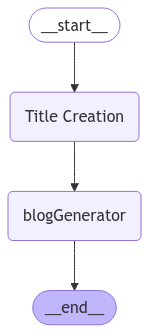

In [20]:
builder = StateGraph(MessagesState)
builder.add_edge(START, "Title Creation")
builder.add_node("Title Creation",title_creation)
builder.add_node("blogGenerator",blog_generator)
builder.add_edge("Title Creation", "blogGenerator")
builder.add_edge("blogGenerator", END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))
# builder.add_node("content",content)

# Invoking the graph

In [21]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages=graph.invoke({"messages":HumanMessage(content="give me blog about the world peace")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

give me blog about the world peace
================================ Human Message =================================

Title: "Achieving Global Harmony: Steps Towards World Peace"
================================ Human Message =================================

### Title: Achieving Global Harmony: Steps Towards World Peace

#### Introduction
In a world marked by conflict, division, and strife, the concept of world peace seems like an elusive dream. However, the pursuit of global harmony is not just a utopian ideal; it is a necessary goal for the survival and prosperity of humanity. This blog post explores the steps we can take to move closer to a world where peace prevails.

#### Understanding World Peace
World peace is not merely the absence of war; it encompasses a state of harmony, cooperation, and mutual respect among all nations and peoples. It involves addressing the root causes of conflict, such as p